# QCTO - Workplace Module

### Project Title: Avocado Prices Prediction
#### Done By: Samukelisiwe Ndaba

© ExploreAI 2024

https://trello.com/b/QAFHdvNN/data-science-capstone-project-management 


https://github.com/SamuNdaba/Capstone-Project

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>



---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
  

* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.

---

#### **Background Context**

*   Avocados seem to be increasingly popular among millennials. It was observed that over 2.6 billion pounds of avocado were consumed in the United States alone in 2020, as opposed to only 436 million pounds consumed in the year 1985, as per Statista.
* Avocados are seen as a healthy option and are popular for being a good source of “good fats”. The fruit can be spread on toast, eaten raw, or even consumed in the form of a shake. Guacamole, which is a Mexican dip, is also made from avocados.
* Like most other products, the price of avocados fluctuates based on season and supply, which is why it would be beneficial to have a machine learning model to monitor and predict avocado prices.

#### **Problem Statement**

* More awareness of the sales and prices of avocados can benefit the vendors, producers, associations, and companies. Price prediction based on sales would be a good input in the market to determine shifting of produce to locations where the fruit is more in demand or even encouragement of consumption in places where demand is not up to the mark.
* Due to the uncertainty in the prices, the companies are not able to sell their produce at the optimal price.
* This notebook provides a detailed analysis of historical avocado prices and sales volume across multiple US markets. The analysis focuses on identifying trends, seasonal patterns, regional variations, and relationships between price and volume using advanced statistical visualization techniques.
* The idea here is to predict future prices based on data collected of past prices based on geographical location, weather changes, and seasonal availability of avocados.
* We are going to implement and evaluate 4 models:Extra Trees Regressor,Linear Regression,Gradient Boosting and Random Forest
* We are going to use matrices: MAE,MSE,RMSE,R2

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")
from pandas import util
from decimal import Decimal, ROUND_HALF_UP
import calendar
##from datetime import datetime
import datetime as dt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

#### **Dataset**
* The dataset represents weekly retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
* The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the data are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
* The dataset consists of the information about HASS Avocado. Historical data on avocado prices and sales volume in multiple US markets. Various variables present in the dataset includes Date, AveragePrice,Total Volume, Total Bags,Year,Type etc.
* The dataset comprises of 18249 observations of 14 columns.

#### **Description:**
* Unnamed = SNo.
* Date = The date of the observation
* AveragePrice = The average price of a single avocado
* Total Volume = Total number of avocados sold
* plu4046 = Total number of avocados with PLU 4046 sold(PLU 4046: non-organic small/medium Hass Avocados(~3-5 oz))
* plu4225 = Total number of avocados with PLU 4225 sold( PLU 4225:non-organic large Hass Avocados (~8-10 oz))
* plu4770 = Total number of avocados with PLU 4770 sold(PLU 4770: non-organic extra large Hass Avocados (~10-15 oz))
* TotalBags = Total Number of Bags sold
* SmallBags = Total Number of Small Bags sold
* LargeBags = Total Number of Large Bags sold
* XLargeBags = Total Number of XLarge Bags sold
* type = Organic or Conventional
* year = The year of observation
* region = The city or region of the observationobservation


In [2]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
#Please use code cells to code in and do not forget to comment your code.
# Load the data. Ensure that the csv file is in the same folder as the notebook.
df = pd.read_csv("Avocado.csv")

In [4]:
# Check the first few rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Check the last few rows of the dataset
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
# Check the number of records and features/columns in the dataset
df.shape

(18249, 14)

- Dataset  has __18249 rows__ and __14 columns.__

In [7]:
# Check the fearture/column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
# data type for each column
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- We can see all columns having count __18249__. Looks like it doesn't contain missing values
- Date and region - object datatype.
- AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags -float datatype
- year- int datatype

In [10]:
# check if there is any null values present in the dataset.
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- As a first observation we can see that we do not have any missing values in this dataset so we can proceed further easily with this dataset.


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [11]:
# drop the unnecessary column. The column unnamed is just an index so it is not needed.
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
# Check if there is any duplicate values present in the dataset
df.duplicated().sum()

0

There are no duplicate values in this dataset.

In [13]:
# Renaming column names for better understanding
df.rename(columns={'4046':'Small_Hass',
           '4225':'Large_Hass',
           '4770':'Extralarge_Hass'},inplace=True)
df.head()

,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
# Checking the column names after renaming
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small_Hass', 'Large_Hass',
       'Extralarge_Hass', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Season'] = df['Month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                3: 'Spring', 4: 'Spring', 5: 'Spring',
                                6: 'Summer', 7: 'Summer', 8: 'Summer',
                                9: 'Fall', 10: 'Fall', 11: 'Fall'})

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [16]:
# Check the Statistical Summary of the dataset
# You can get idea about which column has missing values using this
df.describe()

,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,Quarter
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612,2.402323
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000,1.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000,1.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000,2.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000,3.000000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000,4.000000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281,1.147834


- The average price of avocado is __1.405__ and minimum __0.44__ maximum is __3.25__
- Average Prices seems normally distributed as mean and median are closure to each other.
- Data at Total Volume, Avocado Types (4046, 4225, 4770), Total Bags (Small, Large, XLarge) seems highly skewed Right side (positive skewed) 

In [17]:
#Correlation Analysis

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,Quarter
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386,0.172177
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747,-0.025484
Small_Hass,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159,-0.027167
Large_Hass,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393,-0.022079
Extralarge_Hass,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009,-0.033886
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988,-0.023742
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870,-0.024371
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352,-0.020424
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319,-0.014023
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475,-0.175738


In [18]:
# Checking the unique value for 'type' column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

There are two types of avocado - __conventional and organic__

In [19]:
print("Organic ",df[df["type"]=="organic"]["Date"].count())
print("conventional ",df[df["type"]=="conventional"]["Date"].count())

Organic  9123
conventional  9126


__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

In [20]:
#Please use code cells to code in and do not forget to comment your code.

##### __Overall Price Distribution__

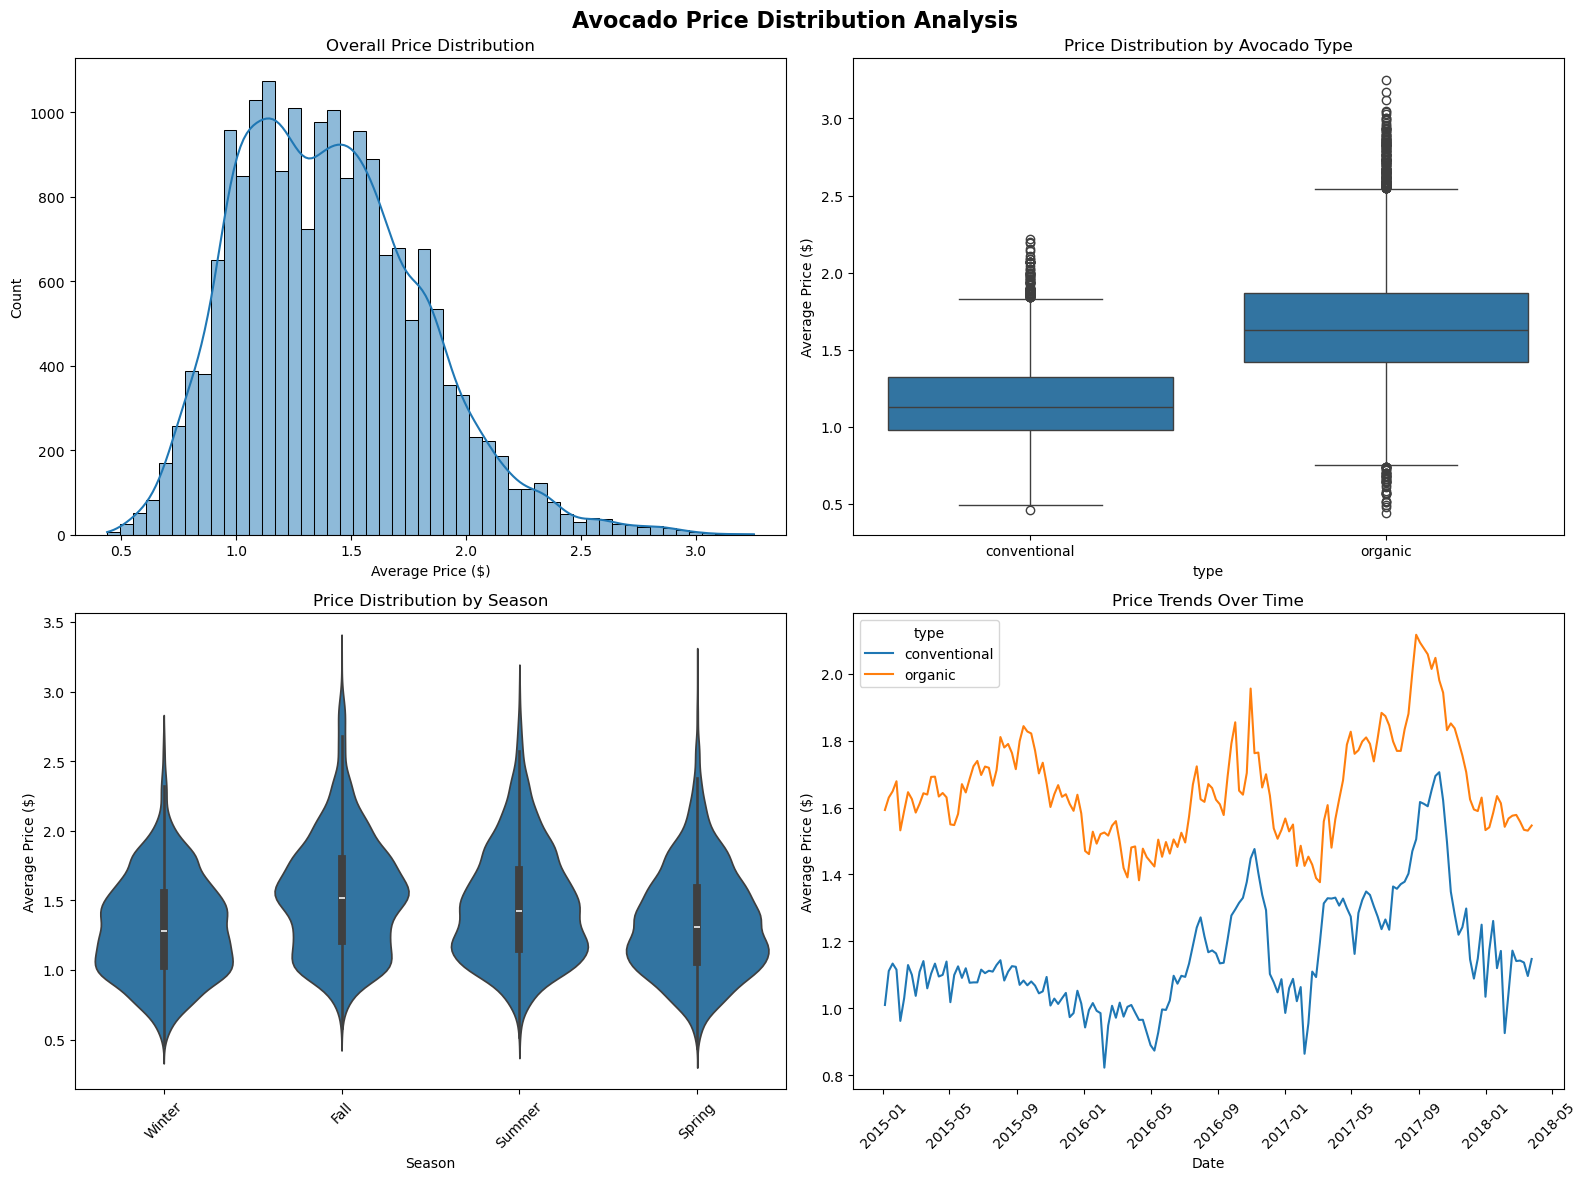

In [21]:
# Create a comprehensive price analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Avocado Price Distribution Analysis', fontsize=16, fontweight='bold')

# Overall price distribution
sns.histplot(data=df, x='AveragePrice', bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title('Overall Price Distribution')
axes[0,0].set_xlabel('Average Price ($)')

# Price distribution by type
sns.boxplot(data=df, x='type', y='AveragePrice', ax=axes[0,1])
axes[0,1].set_title('Price Distribution by Avocado Type')
axes[0,1].set_ylabel('Average Price ($)')

# Price distribution by season
sns.violinplot(data=df, x='Season', y='AveragePrice', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Season')
axes[1,0].set_ylabel('Average Price ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Price trends over time
monthly_prices = df.groupby(['Date', 'type'])['AveragePrice'].mean().reset_index()
sns.lineplot(data=monthly_prices, x='Date', y='AveragePrice', hue='type', ax=axes[1,1])
axes[1,1].set_title('Price Trends Over Time')
axes[1,1].set_ylabel('Average Price ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Overall Price Distribution (Top-Left)
- The histogram shows that most avocado prices fall between 0.5 and 1.5.
- There's a right-skewed distribution__, indicating fewer instances of higher prices.
- The peak is around 1.0, suggesting this is the most common price point.

Price Distribution by Avocado Type (Top-Right)
- The boxplot compares conventional vs organic avocados.
- Organic avocados have a higher median price and a wider price range.
- Conventional avocados are generally cheaper and more consistent in pricing.
- There are more outliers in organic pricing, indicating occasional spikes.

Price Distribution by Season (Bottom-Left)
- Prices tend to be higher in winter and spring, and lower in summer and fall.
- Winter shows the widest spread, suggesting more variability.
- Summer has the lowest median price, possibly due to higher supply or lower demand.

Price Trends Over Time (Bottom-Right)
- The line plot shows seasonal fluctuations in price over time.
- Organic avocados consistently maintain higher prices than conventional ones.
- There are cyclical patterns, likely tied to harvest seasons and market demand.
- Some price spikes are visible, possibly linked to holidays or supply chain issues.

Summary Insights
- Organic avocados are priced higher but show more volatility.
- Seasonality plays a significant role in pricing, with winter and spring being more expensive.
- Overall prices are concentrated around 1.0, with few extreme values.
- Time trends reveal consistent seasonal cycles and a clear distinction between avocado types_


#####  __Regional Price Analysis__

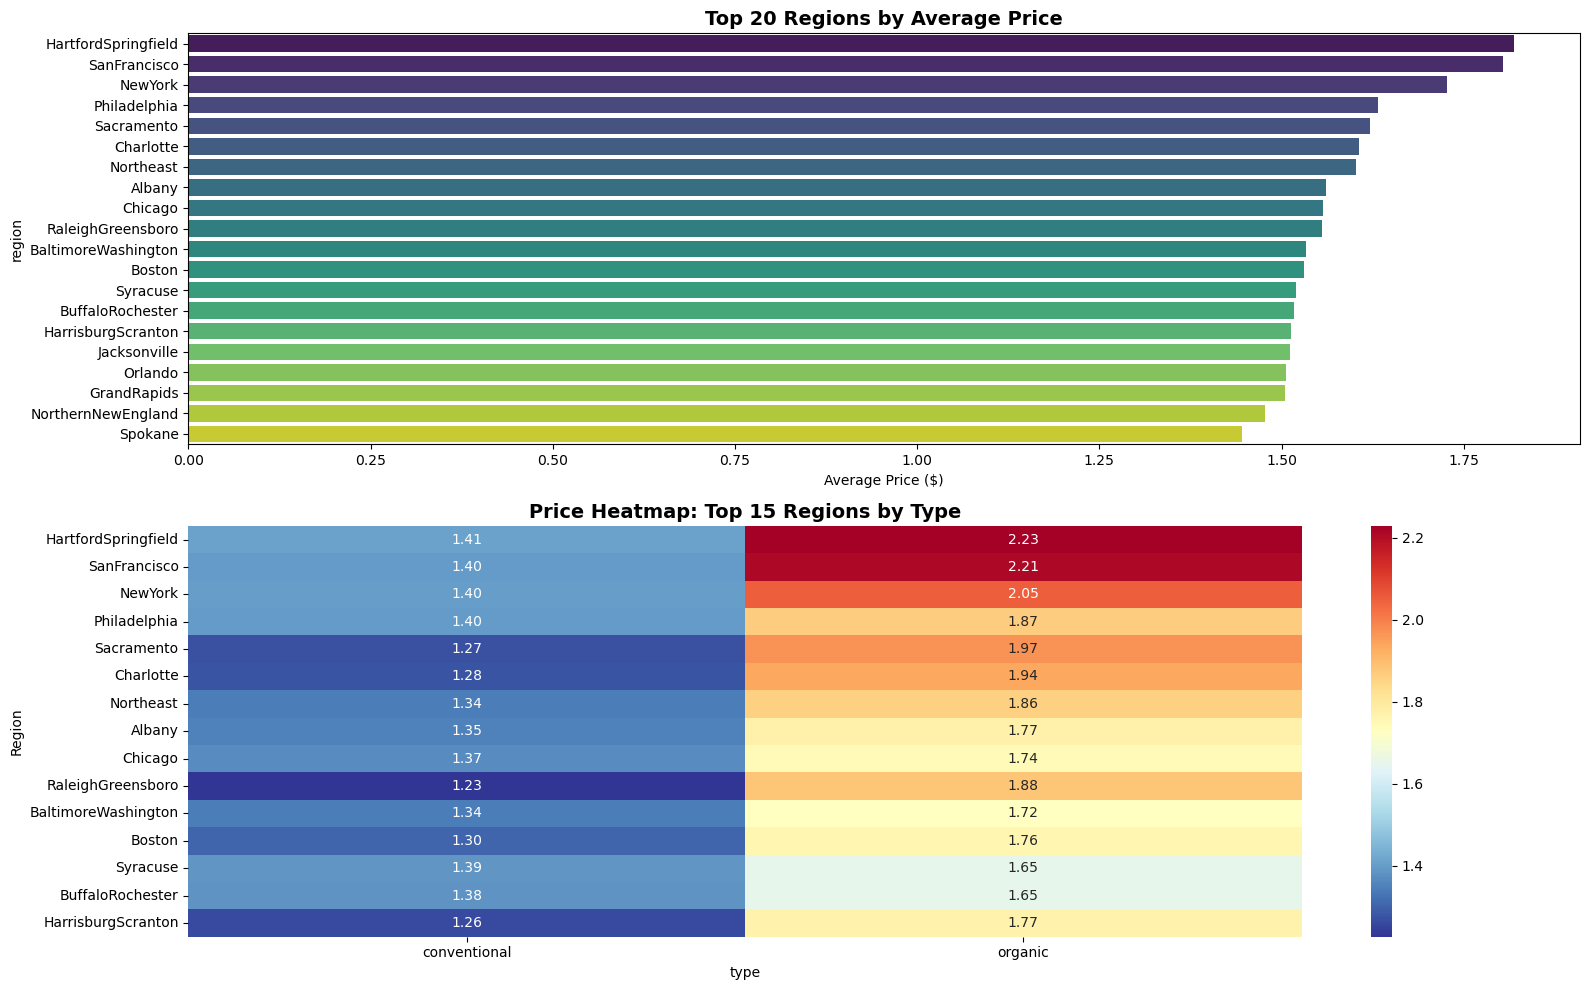

In [22]:
# Regional price comparison
plt.figure(figsize=(16, 10))

# Top 20 regions by average price
top_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(20)

plt.subplot(2, 1, 1)
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Top 20 Regions by Average Price', fontsize=14, fontweight='bold')
plt.xlabel('Average Price ($)')

# Regional price heatmap by type
plt.subplot(2, 1, 2)
regional_type_prices = df.groupby(['region', 'type'])['AveragePrice'].mean().unstack()
top_regions_heatmap = regional_type_prices.loc[top_regions.head(15).index]
sns.heatmap(top_regions_heatmap, annot=True, fmt='.2f', cmap='RdYlBu_r')
plt.title('Price Heatmap: Top 15 Regions by Type', fontsize=14, fontweight='bold')
plt.ylabel('Region')

plt.tight_layout()
plt.show()

Top 20 Regions by Average Price
- Highest average prices are observed in regions like HartfordSpringfield, SanFrancisco, and NewYork.
- These regions likely reflect higher living costs, premium market demand, or organic preference.
- Southern and midwestern regions tend to have lower average prices, possibly due to local supply or lower organic demand.

Price Heatmap by Type (Top 15 Regions)
- Organic avocados are consistently more expensive across all top regions.
- HartfordSpringfield shows a notable price gap between organic and conventional types.
- SanFrancisco and NewYork also show high organic prices, indicating strong demand for premium produce.
- Some regions like BuffaloRochester and CincinnatiDayton have smaller price gaps, suggesting more balanced market preferences.

Summary Insight
- Regional pricing is influenced by urbanization, consumer preferences, and organic market penetration.
- Organic avocados command a premium in most top regions.
- Price gaps between types can help identify regions with potential for organic market growth or price optimization.


##### __Sales Volume Patterns__

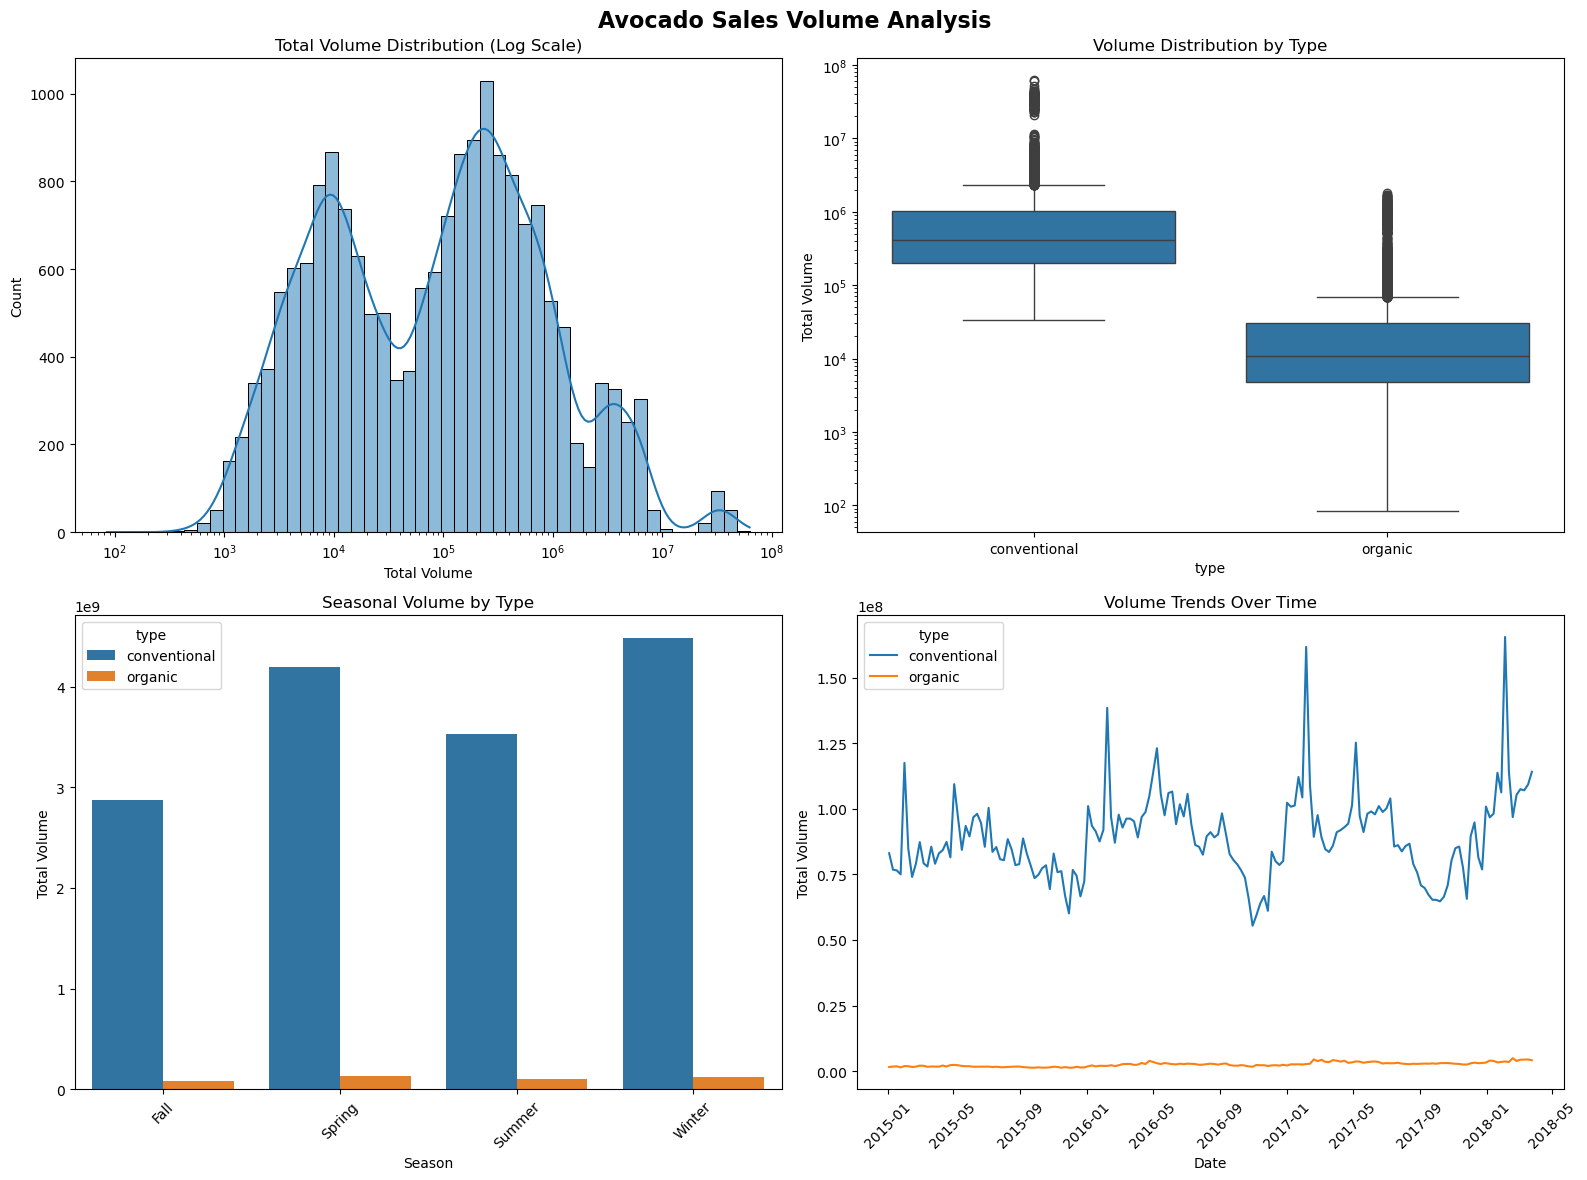

In [23]:
# Comprehensive volume analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Avocado Sales Volume Analysis', fontsize=16, fontweight='bold')

# Total volume distribution
sns.histplot(data=df, x='Total Volume', bins=50, kde=True, log_scale=True, ax=axes[0,0])
axes[0,0].set_title('Total Volume Distribution (Log Scale)')
axes[0,0].set_xlabel('Total Volume')

# Volume by type
sns.boxplot(data=df, x='type', y='Total Volume', ax=axes[0,1])
axes[0,1].set_title('Volume Distribution by Type')
axes[0,1].set_ylabel('Total Volume')
axes[0,1].set_yscale('log')

# Seasonal volume patterns
seasonal_volume = df.groupby(['Season', 'type'])['Total Volume'].sum().reset_index()
sns.barplot(data=seasonal_volume, x='Season', y='Total Volume', hue='type', ax=axes[1,0])
axes[1,0].set_title('Seasonal Volume by Type')
axes[1,0].set_ylabel('Total Volume')
axes[1,0].tick_params(axis='x', rotation=45)

# Volume trends over time
monthly_volume = df.groupby(['Date', 'type'])['Total Volume'].sum().reset_index()
sns.lineplot(data=monthly_volume, x='Date', y='Total Volume', hue='type', ax=axes[1,1])
axes[1,1].set_title('Volume Trends Over Time')
axes[1,1].set_ylabel('Total Volume')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Total Volume Distribution (Log Scale)
- The histogram shows a right-skewed distribution, meaning most sales volumes are relatively low, but there are a few very high-volume entries.
- The log scale helps visualize the spread more clearly, revealing a concentration of data around 10⁴ to 10⁵ units.
- This suggests that while small-scale sales are common, there are significant spikes in volume likely tied to major markets or seasonal demand.

Volume Distribution by Type
- The boxplot (log-scaled) shows that conventional avocados have much higher sales volumes than organic ones.
- Organic avocados have a lower median volume and a tighter distribution, indicating more consistent but smaller-scale sales.
- Conventional avocados show a wider spread and more outliers, reflecting large-scale distribution in certain regions or times.

Seasonal Volume by Type
- Spring and Winter are the peak seasons for avocado sales, especially for conventional types.
- Organic sales are relatively stable across seasons but peak slightly in Spring.
- Fall shows the lowest overall volume, possibly due to reduced harvest or demand.

Volume Trends Over Time
- The line plot reveals cyclical patterns in avocado sales volume.
- Conventional avocados dominate in volume consistently over time.
- There are clear seasonal spikes, especially around early Spring and late Fall, aligning with the seasonal barplot.
- Organic volume remains lower but shows steady growth, indicating increasing market penetration.

Summary Insights
- Conventional avocados drive the bulk of sales volume, with significant seasonal and regional variability.
- Organic avocados are more niche but show consistent demand.
- Spring and Winter are key seasons for avocado sales, with volume trends reflecting harvest cycles and consumer behavior.
- The log scale reveals the presence of high-volume outliers, likely tied to large urban markets or promotional periods.

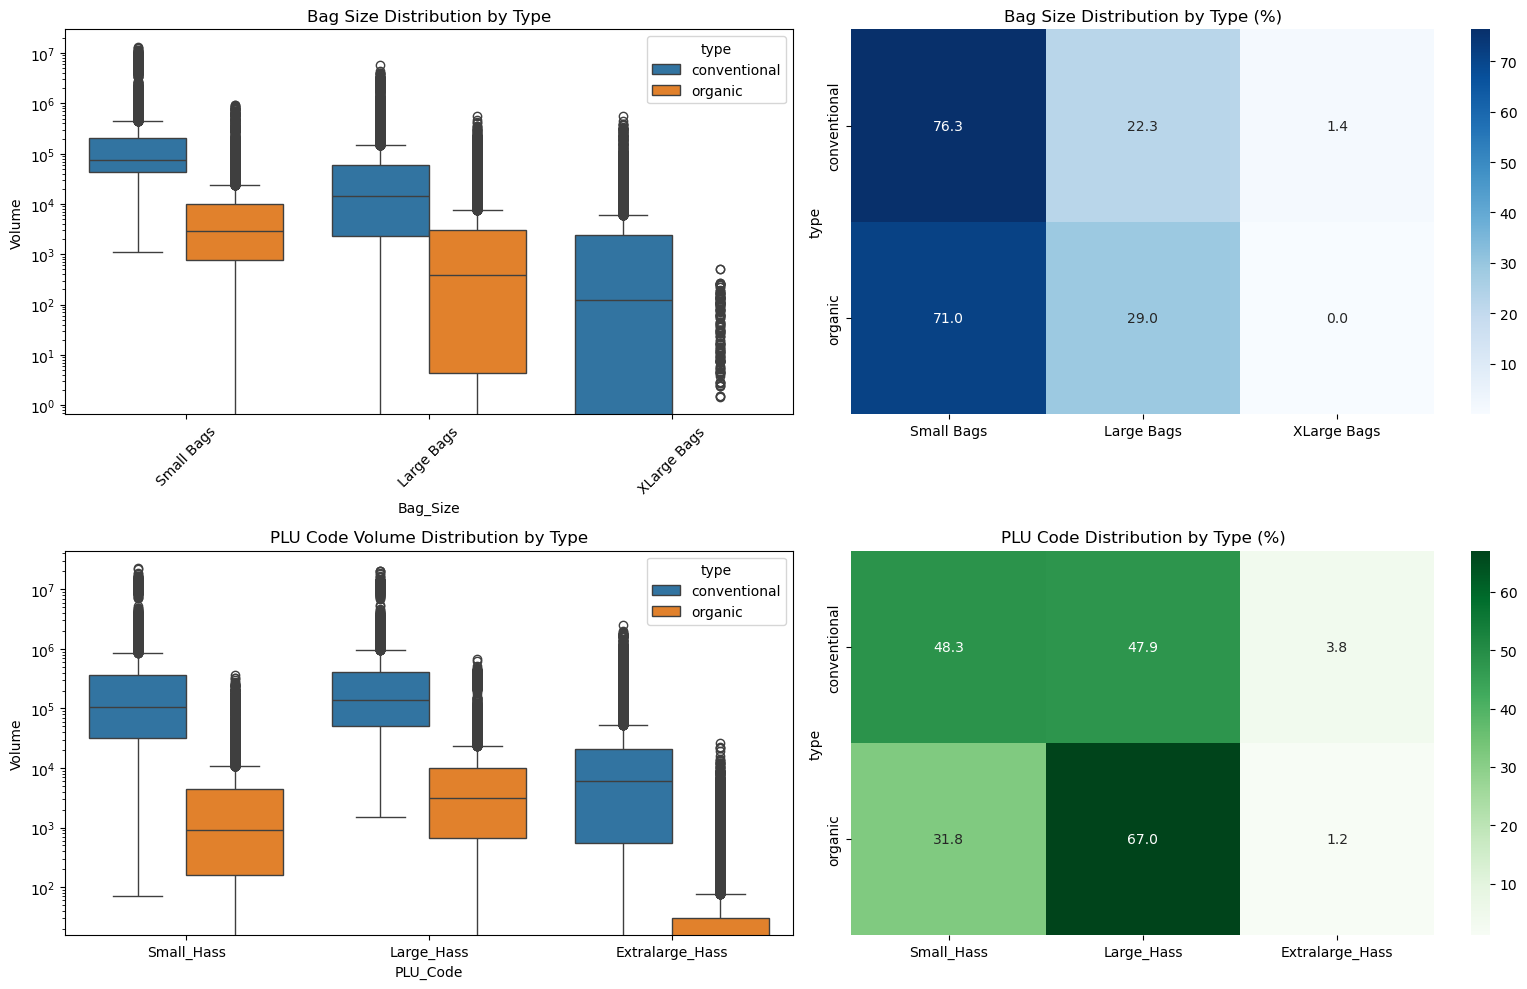

In [24]:
# Bag size analysis
plt.figure(figsize=(16, 10))

# Prepare bag data
bag_columns = ['Small Bags', 'Large Bags', 'XLarge Bags']
bag_data = df[bag_columns + ['type']].melt(id_vars=['type'], 
                                           value_vars=bag_columns,
                                           var_name='Bag_Size', 
                                           value_name='Volume')

plt.subplot(2, 2, 1)
sns.boxplot(data=bag_data, x='Bag_Size', y='Volume', hue='type')
plt.title('Bag Size Distribution by Type')
plt.yscale('log')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
bag_proportions = df.groupby('type')[bag_columns].sum()
bag_proportions_pct = bag_proportions.div(bag_proportions.sum(axis=1), axis=0) * 100
sns.heatmap(bag_proportions_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Bag Size Distribution by Type (%)')

plt.subplot(2, 2, 3)
# PLU code analysis (Small_Hass, Large_Hass, Extralarge_Hass)
plu_columns = ['Small_Hass', 'Large_Hass', 'Extralarge_Hass']
plu_data = df[plu_columns + ['type']].melt(id_vars=['type'], 
                                           value_vars=plu_columns,
                                           var_name='PLU_Code', 
                                           value_name='Volume')
sns.boxplot(data=plu_data, x='PLU_Code', y='Volume', hue='type')
plt.title('PLU Code Volume Distribution by Type')
plt.yscale('log')

plt.subplot(2, 2, 4)
plu_proportions = df.groupby('type')[plu_columns].sum()
plu_proportions_pct = plu_proportions.div(plu_proportions.sum(axis=1), axis=0) * 100
sns.heatmap(plu_proportions_pct, annot=True, fmt='.1f', cmap='Greens')
plt.title('PLU Code Distribution by Type (%)')

plt.tight_layout()
plt.show()

##### Bag Size Distribution by Type (Boxplot)

- Small Bags dominate in volume across both conventional and organic types.
- Organic avocados show a tighter distribution and generally lower volumes across all bag sizes.
- XLarge Bags have the lowest volume and highest variability, especially in conventional type.

Bag Size Distribution by Type (%) (Heatmap)
- Conventional avocados:76% of volume comes from Small Bags.Large Bags contribute 22%, while XLarge Bags are negligible.
- Organic avocados:71% from Small Bags, showing even stronger reliance on smaller packaging.
- Large Bags contribute 1%, and XLarge Bags are almost u
used.

PLU Code Volume Distribution by Type (Boxplot)
- Small_Hass and Large_Hass are the most commonly sold codes, with Large_Hass showing higher median volume.
- Extralarge_Hass has the lowest volume and highest variability.
- Conventional avocados dominate across all PLU codes in terms of v

PLU Code Distribution by Type (%) (Heatmap)
- Conventional avocados: Large_Hass contributes 48% of volume.Small_Hass 48%, and Extralarge_Hass 4%.
- Organic avocados: Large_Hass 67%, Small_Hass 32%, and Extralarge_Hass 1%.
- The distribution is similar across types, but conventional avocados have higher absolute volumes.

Summary Insights
- Small Bags are the preferred packaging format, especially for conventional avocados.
- Large_Hass is the most dominant code, followed by Small_Hass.
- Organic avocados are sold in smaller volumes and smaller bags, reflecting niche market behavior.
- XLarge Bags and Extralarge_Hass are marginal contributors, possibly used for bulk or specialty sales.lumes..


##### __Correlation Analysis__

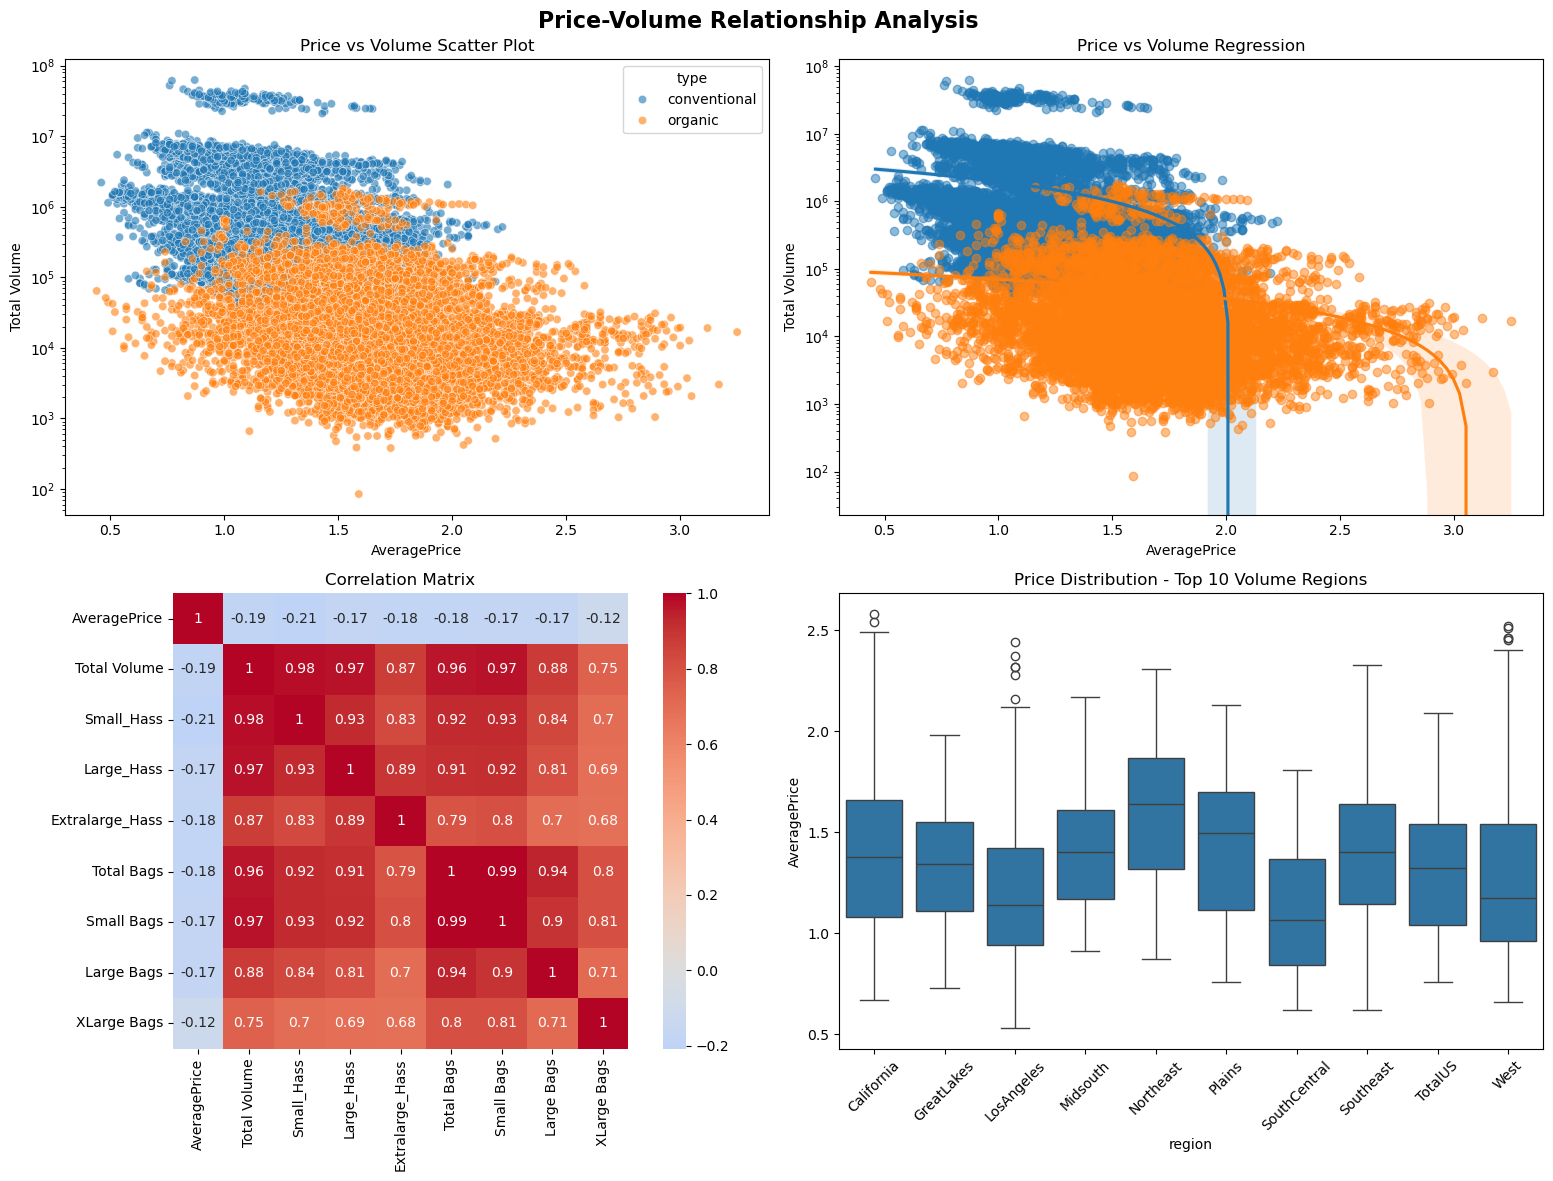

In [25]:
# Price-volume relationship
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Price-Volume Relationship Analysis', fontsize=16, fontweight='bold')

# Overall price vs volume scatter
sns.scatterplot(data=df, x='AveragePrice', y='Total Volume', 
                hue='type', alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Price vs Volume Scatter Plot')
axes[0,0].set_ylabel('Total Volume')
axes[0,0].set_yscale('log')

# Price vs volume by type
for i, avocado_type in enumerate(df['type'].unique()):
    type_data = df[df['type'] == avocado_type]
    sns.regplot(data=type_data, x='AveragePrice', y='Total Volume', 
                scatter_kws={'alpha': 0.5}, ax=axes[0,1] if i == 0 else axes[0,1])
axes[0,1].set_title('Price vs Volume Regression')
axes[0,1].set_ylabel('Total Volume')
axes[0,1].set_yscale('log')

# Correlation heatmap
numeric_columns = ['AveragePrice', 'Total Volume', 'Small_Hass', 'Large_Hass', 'Extralarge_Hass', 
                   'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[1,0])
axes[1,0].set_title('Correlation Matrix')

# Price elasticity by region (top 10 regions)
top_regions = df.groupby('region')['Total Volume'].sum().nlargest(10).index
elasticity_data = df[df['region'].isin(top_regions)]
sns.boxplot(data=elasticity_data, x='region', y='AveragePrice', ax=axes[1,1])
axes[1,1].set_title('Price Distribution - Top 10 Volume Regions')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Price vs Volume Scatter Plot (Top-Left)
- There's a negative relationship between price and volume: as price increases, volume tends to decrease.
- Conventional avocados dominate in volume, especially at lower price points.
- Organic avocados show lower volumes and are more concentrated around higher prices.

Price vs Volume Regression (Top-Right)
- The regression lines confirm the inverse relationship between price and volume for both types.
- Conventional avocados show a steeper decline, indicating stronger price sensitivity.
- Organic avocados have a flatter slope, suggesting more stable demand despite price changes.

Correlation Matrix (Bottom-Left)
- AveragePrice has a negative correlation with all the features.
- Total Volume is strongly correlated with Small_Hass and Small bags.This indicates that small bag sales and small_hass drive overall volume.

Price Distribution in Top 10 Volume Regions (Bottom-Right)
- Regions like LosAngeles, NewYork, and Chicago show higher price variability.
- PhoenixTucson and DallasFtWorth have lower and more stable prices.
- This reflects regional elasticity, where urban markets tolerate wider price ranges.

Summary Insights
- There's a clear inverse relationship between price and volume, especially for conventional avocados.
- Organic avocados are less sensitive to price changes, indicating a niche but loyal market.
- PLU codes and small bags are key drivers of volume.
- Regional price elasticity varies, with urban centers showing more flexibility in pricing.



---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [26]:
#Please use code cells to code in and do not forget to comment your code.


Having understood the relationships and correlations between the features and the target variable, it’s time to prepare the data for modeling. This involves several steps:
- Encoding Categorical Variables: The “type” and “region” variables are categorical and need to be encoded.
- Feature Selection: Based on the correlation matrix and business understanding, we’ll decide which features to include in the model.
- Data Splitting: We’ll split the data into training and testing sets to validate the model’s performance.

In [27]:
# One-hot encode the 'type' and 'region' columns
avocado_data_encoded = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

# Show the first few rows after one-hot encoding
avocado_data_encoded.head()

,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,False,False,False,False,False,False,False,False,False,False


##### __Observations on Encoding:__
- The categorical variables “type” and “region” have been successfully one-hot encoded, adding new columns to the dataset for each category.
- We used the drop_first=True option to avoid the "dummy variable trap," which occurs when the dummy variables are highly correlated.

##### __Feature Selection__
- Based on the correlation matrix and business understanding, we’ll proceed with the following features:
- The log-transformed numerical features: “Total Volume,” “Small_Hass,” “Large_Hass,” “Extralarge_Hass,” “Total Bags,” “Small Bags,” “Large Bags,” and “XLarge Bags.”
- The one-hot encoded “type” and “region” columns.
- We’ll not include the “Year” as it is implicitly captured in the “Date” column, and we are going to model based on other features.

##### __Data Splitting__
- We’ll split the data into training and testing sets, using 80% of the data for training and 20% for testing.

In [28]:
# Features and target variable
X = avocado_data_encoded.drop(columns=['Date', 'AveragePrice','Season','Month','Day','Month_Name','Quarter'])
y = avocado_data_encoded['AveragePrice']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14599, 63), (3650, 63), (14599,), (3650,))

##### __Observations on Data Splitting:__
- The data has been successfully split into training and testing sets.
- The training set contains 14599 samples, while the testing set contains 3650 samples.
- Both sets contain 63 features, which aligns with our feature selection.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [29]:
#Please use code cells to code in and do not forget to comment your code.

##### __Implementing and Evaluating Models__
- We are going to use the below models:

- Linear Regression: A fundamental machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables.
- Random Forest Regression: An ensemble method that can capture complex relationships and interactions between features.
- Gradient Boosting Regression: A boosting algorithm that builds strong predictive models by combining the predictions of several base estimators.
- Extra Trees Regressor model: An ensemble learning method used for regression and classification tasks. It builds upon the principles of decision trees and random forests but introduces extra randomness to improve generalization and reduce overfitting.

- We are going to use the below matrices:
- MAE
- MSE
- RMSE
- R2

In [30]:
summary = []
comparison_df = pd.DataFrame({"Actual": y_test.reset_index(drop=True)})
def evaluate_model(ml_model, test, pred):
    model = {}
    model['model'] = ml_model
    model['mae'] = mean_absolute_error(test,pred)
    model['mse'] = mean_squared_error(test,pred)
    model['rmse'] = np.sqrt(model['mse'])
    model['r2'] = r2_score(test,pred)
    summary.append(model)
    
    print(f'MAE: %.4f' % model['mae'])
    print(f'MSE: %.4f' % model['mse'])
    print(f'RMSE: %.4f' % model['rmse'])
    print(f'R2 Score: %.4f' % model['r2'])

    # plot the y_test y_pred
    plt.scatter(test,pred)
    plt.title(f"{ml_model} y_test vs y_pred")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    filename = f"plot_{ml_model}.png"
    # plt.savefig(filename, bbox_inches="tight")
    plt.show()

##### __Baseline Model: Linear Regression__

MAE: 0.2035
MSE: 0.0730
RMSE: 0.2702
R2 Score: 0.5458


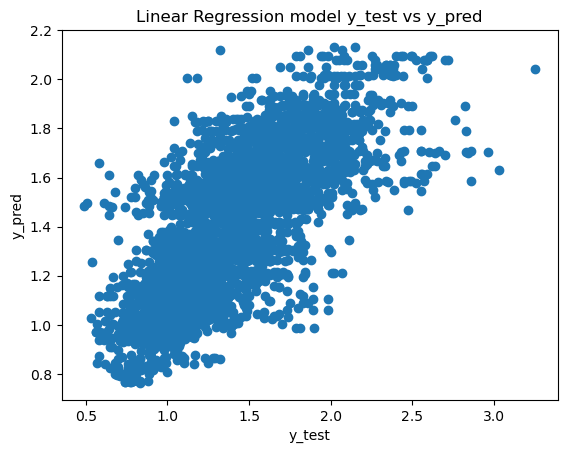

In [31]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict the average prices on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
evaluate_model('Linear Regression model', y_test, y_pred_lr)
# Collect predictions
comparison_df['y_pred_lr'] = y_pred_lr

##### __Baseline Model (Linear Regression) Evaluation:__
- RMSE (Root Mean Square Error): 0.270 .RMSE gives us an idea of how much error there is between two sets of data. In this case, a lower RMSE is better.
- MAE (Mean Absolute Error): 0.203 .MAE measures the average magnitude of the errors between predicted and observed values. Like RMSE, a lower MAE is better.
- R2 (R-squared): 0.545 .R2 represents the proportion of the variance for the dependent variable that’s explained by the independent variables. Closer to 1 is better.

##### __Random Forest Regression Model__

MAE: 0.1069
MSE: 0.0231
RMSE: 0.1521
R2 Score: 0.8559


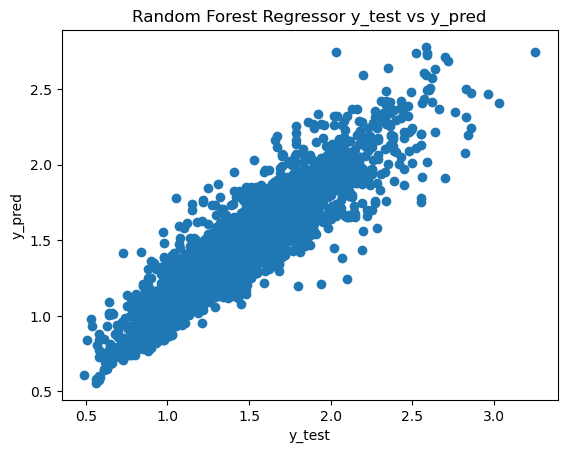

In [32]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the average prices on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
evaluate_model('Random Forest Regressor', y_test, y_pred_rf)
# Collect predictions
comparison_df['y_pred_rf'] = y_pred_rf

##### __Random Forest Regression Model Evaluation:__
- RMSE (Root Mean Square Error):0.152 . The RMSE has improved compared to the baseline Linear Regression model.
- MAE (Mean Absolute Error):0.107 .The MAE has also improved compared to the baseline model.
- R2 (R-squared):0.856 .R2 value is closer to 1 compared to the baseline model, indicating a better fit.
- The Random Forest model shows a significant improvement in all metrics compared to the baseline model.

##### __Gradient Boosting Regression Model__

MAE: 0.1750
MSE: 0.0548
RMSE: 0.2341
R2 Score: 0.6589


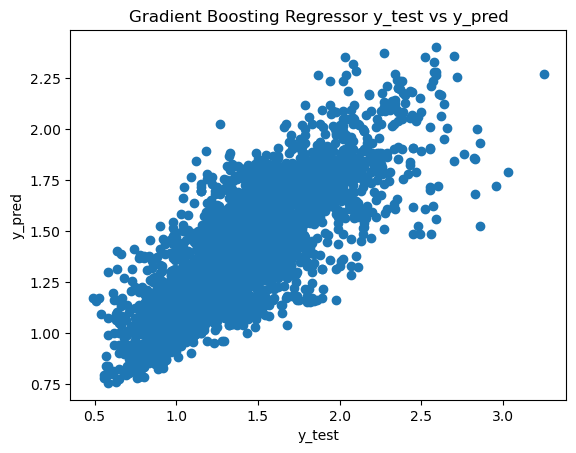

In [33]:
# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict the average prices on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
evaluate_model('Gradient Boosting Regressor', y_test,y_pred_gb)
# Collect predictions
comparison_df['y_pred_gb'] = y_pred_gb

##### __Gradient Boosting Regression Model Evaluation:__
- RMSE (Root Mean Square Error):0.234. The RMSE is slightly lower than the baseline Linear Regression model.
- MAE (Mean Absolute Error):0.175 . The MAE is also slightly lower compared to the baseline model.
- R2 (R-squared):0.659 . 2R2 value is slightly higher compared to the baseline model.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


MAE: 0.0903
MSE: 0.0171
RMSE: 0.1307
R2 Score: 0.8937


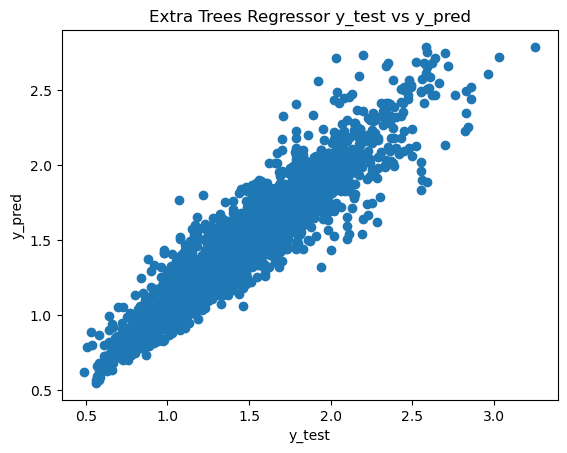

In [34]:
# Initialize the Extra Trees Regressor model
etr = ExtraTreesRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
etr.fit(X_train, y_train)

# Predict the average prices on the test set
y_pred_etr=etr.predict(X_test)

# Evaluate the model
evaluate_model('Extra Trees Regressor', y_test, y_pred_etr)
# Collect predictions
comparison_df['y_pred_etr'] = y_pred_etr

##### __Extra Trees Regressor Model Evaluation:__
- RMSE (Root Mean Square Error):0.131. The RMSE has improved compared to the Random Forest Regression Model.
- MAE (Mean Absolute Error):0.090 . The MAE has also improved compared to the Random Forest Regression Model.
- R2 (R-squared):0.89 . R2 value is closer to 1 compared to the Random Forest Regression Model , indicating a better fit.

##### __Observations:__ 
- Extra Trees Regressor outperforms the other models across all metrics: lowest RMSE and MAE, and highest R2.
- Linear Regression, our baseline model, is relatively simple but still provides decent performance.
- Gradient Boosting did show an improvement over the baseline.
- Random Forest performed better than Linear Regression and Gradient Boosting 

In [35]:
pd.DataFrame(summary).sort_values(by='mse')

,model,mae,mse,rmse,r2
3,Extra Trees Regressor,0.090278,0.017084,0.130707,0.893668
1,Random Forest Regressor,0.106934,0.023146,0.152139,0.855938
2,Gradient Boosting Regressor,0.175019,0.054811,0.234118,0.658857
0,Linear Regression model,0.203521,0.072984,0.270155,0.545753


In [70]:
# Show the first 10 rows of actual vs predicted values
print(comparison_df.head(10))


   Actual  y_pred_lr  y_pred_rf  y_pred_gb  y_pred_etr
0    0.82   1.082455     1.0299   1.064469      1.0421
1    0.97   1.119444     0.9848   1.086151      0.9709
2    1.44   1.652135     1.3995   1.542025      1.3865
3    0.97   1.054016     0.9166   1.084350      0.9235
4    1.45   1.650132     1.4644   1.545178      1.4270
5    1.29   1.530723     1.3960   1.502736      1.3691
6    2.03   1.641303     1.7234   1.566146      1.8558
7    0.94   0.837279     0.9760   1.003720      0.9811
8    2.45   1.709283     2.2190   1.906832      2.4991
9    1.83   1.196109     1.6814   1.301741      1.7353


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

__Conclusion__
- Among the four models tested — Linear Regression, Random Forest, Gradient Boosting, and Extra Trees Regressor — the Extra Trees Regressor delivered the best performance
- Random Forest also performed very well, closely trailing Extra Trees.
- Linear Regression showed the weakest performance, indicating that the relationship between features and avocado prices is non-linear and better captured by ensemble methods.
- Visual comparisons of predicted vs actual prices confirmed that Extra Trees and Random Forest models had predictions closely aligned with actual values.

__Recommendations__
- Use Extra Trees Regressor for future avocado price predictions due to its superior accuracy and robustness.
- Feature Engineering: Consider adding more time-based features (e.g., week of year, holidays) or external factors (e.g., weather, economic indicators) to improve model performance.
- Model Deployment: Package the Extra Trees model into a pipeline for real-time or batch prediction in production environments.
- Monitoring: Regularly retrain the model with fresh data to maintain accuracy over time

__Future Work__
- Hyperparameter Tuning: Use grid search or randomized search to fine-tune model parameters for even better performance.
- Cross-Validation: Implement k-fold cross-validation to ensure model stability and generalization.
- Regional Modeling: Build separate models for high-volume regions to capture localized pricing dynamics.